# NYU Rockstar Datathon 2022 Team Infinite Money Hackers for the Sandbox challenge
@author Laurel Xiang, Michael Poma, Roshan Vemu, Evan Lau <br>
4/30/2022

## Data Processing

In [655]:
#importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import os
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import model_selection
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [656]:
#importing dataset
file = open("activity_played.csv","r",encoding='UTF-8')
activitydf = pd.read_csv(file,header=0,index_col=False)
file.close()
#importing dataset
file = open("gen_player_stats.csv","r",encoding='UTF-8')
playerdf = pd.read_csv(file,header=0,index_col=False)
file.close()
#importing dataset
file = open("item_spend.csv","r",encoding='UTF-8')
itemspenddf = pd.read_csv(file,header=0,index_col=False)
file.close()

In [657]:
print("activity_played dataset size:",activitydf.shape)
print("gen_player_stats dataset size:",playerdf.shape)
print("item_spend dataset size:",itemspenddf.shape)

activity_played dataset size: (845618, 11)
gen_player_stats dataset size: (247984, 9)
item_spend dataset size: (155750, 7)


In [658]:
#checking for null values in the dataset
#frequency table of NaN for activity_played
actfreqlist = []
varnamescompletetemp = list(activitydf.columns)
for var in varnamescompletetemp:
  temp = [var,activitydf.shape[0] - activitydf[var].value_counts().sum(),activitydf.shape[0]]
  actfreqlist.append(temp)
activityfreqtable = pd.DataFrame(actfreqlist,columns=["Variable","# of NaN","Total # of patients"])
#frequency table of NaN for gen_player_stats
playerfreqlist = []
varnamescompletetemp = list(playerdf.columns)
for var in varnamescompletetemp:
  temp = [var,playerdf.shape[0] - playerdf[var].value_counts().sum(),playerdf.shape[0]]
  playerfreqlist.append(temp)
playerfreqtable = pd.DataFrame(playerfreqlist,columns=["Variable","# of NaN","Total # of patients"])
#frequency table of NaN for item_spend
itemfreqlist = []
varnamescompletetemp = list(itemspenddf.columns)
for var in varnamescompletetemp:
  temp = [var,itemspenddf.shape[0] - itemspenddf[var].value_counts().sum(),itemspenddf.shape[0]]
  itemfreqlist.append(temp)
itemfreqtable = pd.DataFrame(itemfreqlist,columns=["Variable","# of NaN","Total # of patients"])

In [659]:
activityfreqtable

,Variable,# of NaN,Total # of patients
0,account_id,0,845618
1,platform_id,0,845618
2,occur_date,0,845618
3,activity_type,0,845618
4,time_spent,0,845618
5,kills,0,845618
6,deaths,0,845618
7,suicides,0,845618
8,money_earned,0,845618
9,rp_earned,0,845618


In [660]:
playerfreqtable

,Variable,# of NaN,Total # of patients
0,account_id,0,247984
1,platform_id,0,247984
2,occur_date,0,247984
3,ltd_days_played,0,247984
4,first_day_played,0,247984
5,evc_balance,0,247984
6,pvc_balance,0,247984
7,char_rank,0,247984
8,daily_playtime,0,247984


In [661]:
itemfreqtable

,Variable,# of NaN,Total # of patients
0,account_id,0,155750
1,platform_id,0,155750
2,occur_date,0,155750
3,item,1615,155750
4,item_type,325,155750
5,item_sub_type,481,155750
6,money_spent,0,155750


Looking at null values in itemfreqtable more closely

In [662]:
itemspenddf.loc[(itemspenddf["item_type"] == "PROPERTY") & (itemspenddf["item_sub_type"] == "OFFICE")]

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent
1332,6766,XBOX,2020-09-04,NaN,PROPERTY,OFFICE,3.989423e+05
1343,8766,PS4,2020-10-03,NaN,PROPERTY,OFFICE,2.393654e+05
1344,9117,XBOX,2020-10-03,NaN,PROPERTY,OFFICE,2.393654e+05
1356,2202,XBOX,2020-09-03,NaN,PROPERTY,OFFICE,3.989423e+05
1358,1629,PC,2020-11-27,NaN,PROPERTY,OFFICE,3.989423e+05
...,...,...,...,...,...,...,...
153780,6170,PS4,2020-09-02,NaN,PROPERTY,OFFICE,5.385721e+05
153783,627,PC,2020-09-22,NaN,PROPERTY,OFFICE,3.989423e+05
153785,8237,XBOX,2020-09-02,NaN,PROPERTY,OFFICE,9.574615e+05
153804,7523,PC,2020-11-06,NaN,PROPERTY,OFFICE,8.976201e+05


In [663]:
itemspenddf.loc[(itemspenddf["item"].isna()),"item_type"].value_counts()

PROPERTY    1615
Name: item_type, dtype: int64

In [664]:
itemspenddf.loc[(itemspenddf["item"].isna()),"item_sub_type"].value_counts()

CONTRABAND WAREHOUSE    980
OFFICE                  635
Name: item_sub_type, dtype: int64

In [665]:
itemspenddf.loc[(itemspenddf["item_type"].isna()) & (itemspenddf["item_sub_type"].isna())]

,account_id,platform_id,occur_date,item,item_type,item_sub_type,money_spent
167,3076,PC,2020-09-26,Stromberg,NaN,NaN,8.895396e+05
214,254,PC,2020-09-07,Stromberg,NaN,NaN,1.270771e+06
387,7561,PC,2020-10-31,Stromberg,NaN,NaN,1.270771e+06
460,624,PS4,2020-09-30,Stromberg,NaN,NaN,8.895396e+05
636,260,PC,2020-11-20,Stromberg,NaN,NaN,1.270771e+06
...,...,...,...,...,...,...,...
151536,4744,PS4,2020-09-23,Stromberg,NaN,NaN,1.270771e+06
151672,4874,PC,2020-10-02,Stromberg,NaN,NaN,1.270771e+06
152475,4674,PC,2020-09-27,Stromberg,NaN,NaN,8.895396e+05
152483,6827,XBOX,2020-11-29,Stromberg,NaN,NaN,5.083083e+05


In [666]:
itemspenddf.loc[(itemspenddf["item_sub_type"].isna()),"item_type"].value_counts()

OTHER    156
Name: item_type, dtype: int64

In [667]:
itemspenddf.loc[(itemspenddf["item_sub_type"].isna()),"item"].value_counts()

Stromberg     325
RC Bandito    156
Name: item, dtype: int64

Null values exist in only the item_spend dataset. <br>
Null values in the item column correspond to "PROPERTY" item type and (1) "CONTRABAND WAREHOUSE" or (2) "OFFICE" item sub type. <br>
Null values in the item_type column correspond to the "Stromberg" item and null values in item sub type. <br>
Null values in the item_sub_type column correspond to the (1) "Stromberg" item or (2) "RC Bandito" item and "OTHER" type

## Dataset Join

In [668]:
#creating large dataset containing all data across all 3 tables
df = pd.merge(playerdf,itemspenddf, how='outer',on=["account_id","platform_id","occur_date"])
print("resulting merge dataset shape (player+item):",df.shape)
df = pd.merge(df,activitydf, how='outer',on=["account_id","platform_id","occur_date"])
print("resulting merge dataset shape (prev + activity):",df.shape)

resulting merge dataset shape (player+item): (338913, 13)
resulting merge dataset shape (prev + activity): (1568602, 21)


In [669]:
df.loc[(df["char_rank"] > 500)].groupby("account_id").head()

,account_id,platform_id,occur_date,ltd_days_played,first_day_played,evc_balance,pvc_balance,char_rank,daily_playtime,item,...,item_sub_type,money_spent,activity_type,time_spent,kills,deaths,suicides,money_earned,rp_earned,success
739,89,PC,2020-10-16,9.0,2020-09-09,4.468851e+07,0.0,4001.0,0.472769,Lampadati Novak,...,SUV,2.425569e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,89,PC,2020-10-16,9.0,2020-09-09,4.468851e+07,0.0,4001.0,0.472769,Pfister Comet,...,SPORT,3.989423e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,89,PC,2020-10-16,9.0,2020-09-09,4.468851e+07,0.0,4001.0,0.472769,Principe Diabolus,...,MOTORCYCLE,6.742125e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,89,PC,2020-10-16,9.0,2020-09-09,4.468851e+07,0.0,4001.0,0.472769,Stromberg,...,NaN,1.270771e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,89,PC,2020-10-16,9.0,2020-09-09,4.468851e+07,0.0,4001.0,0.472769,Pegassi FCR 1000,...,MOTORCYCLE,5.385721e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551569,9422,XBOX,2020-09-09,416.0,2016-01-26,6.310563e+08,0.0,4001.0,1.293988,NaN,...,NaN,NaN,Race,2.697059,0.0,0.0,0.0,5072.058076,0.0,1.0
1551570,9422,XBOX,2020-09-09,416.0,2016-01-26,6.310563e+08,0.0,4001.0,1.293988,NaN,...,NaN,NaN,Race,2.403661,0.0,0.0,0.0,2403.511127,0.0,1.0
1551571,9422,XBOX,2020-09-09,416.0,2016-01-26,6.310563e+08,0.0,4001.0,1.293988,NaN,...,NaN,NaN,Race,2.843594,0.0,0.0,0.0,3804.043557,0.0,1.0
1551785,9422,XBOX,2020-11-23,506.0,2016-01-26,6.148400e+08,0.0,4001.0,1.480364,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [670]:
#merged dataframe of player and activity data
newdf = pd.merge(playerdf,activitydf, how='outer',on=["account_id","platform_id","occur_date"])


## Data Exploration

In [671]:
#checking if anyone with high rank made any purchases using USD during the given timeframe - none were found
spentmoney = []
for i in set(df.loc[df["char_rank"] > 1000]["account_id"]):
    if newdf.loc[newdf["account_id"] == i].sort_values(["char_rank","occur_date"]).loc[(newdf["pvc_balance"] != 0) & (newdf["pvc_balance"].notna())].shape[0] != 0:
        spentmoney.append(i)
spentmoney

[]

In [672]:
#example of suspicious account
df.loc[df["account_id"] == 3916].sort_values(["char_rank","occur_date"])[["account_id","occur_date","pvc_balance","char_rank"]]

,account_id,occur_date,pvc_balance,char_rank
657654,3916,2020-09-06,0.0,3336.0
671238,3916,2020-09-08,0.0,3336.0
671239,3916,2020-09-08,0.0,3336.0
671240,3916,2020-09-08,0.0,3336.0
657187,3916,2020-09-09,0.0,3336.0
657188,3916,2020-09-09,0.0,3336.0
657189,3916,2020-09-09,0.0,3336.0
657190,3916,2020-09-09,0.0,3336.0
657191,3916,2020-09-09,0.0,3336.0
670619,3916,2020-09-10,0.0,3336.0


In [673]:
# playerdf = playerdf.sort_values(["occur_date","char_rank"])
# sus = []
# temp = 0
# for i in range(len(playerdf) - 1):
#     if playerdf.loc[i, "account_id"] != playerdf.loc[i, "account_id"]:
#         continue
#     if int(playerdf.loc[i + 1,"char_rank"] - playerdf.loc[i,"char_rank"]) > 20:
#         sus.append(playerdf.loc[i,"account_id"])

In [674]:
# sus = set(sus)
# len(sus)

## Testing the significance of platform on USD spent in game

In [675]:
df["platform_id"].value_counts().index.tolist()

['XBOX', 'PC', 'PS4']

In [676]:
a = playerdf[["account_id","pvc_balance","platform_id"]]
a = a.sort_values(["account_id","pvc_balance"])

In [677]:
a.loc[a["platform_id"] == "XBOX", "platform_id"] = 0
a.loc[a["platform_id"] == "PS4", "platform_id"] = 1
a.loc[a["platform_id"] == "PC", "platform_id"] = 2

In [678]:
t,p = stats.ttest_ind(a["platform_id"], a["pvc_balance"])

In [679]:
print("P and T value of platform against money used\nt:",t,"\np:", p)

P and T value of platform against money used
t: -30.75979412626456 
p: 1.420809962809516e-207


## Identifying "Flagged" Metrics

Text(0.5, 1.0, 'R^2: 0.449')

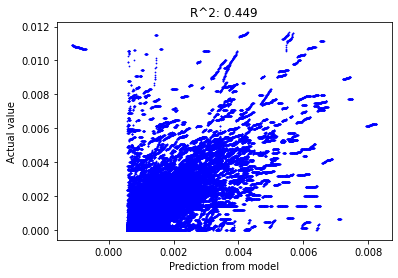

In [680]:
#flag metric 1
#normalizing ariables in preparation for linear regression
Y = np.array(playerdf.loc[playerdf["char_rank"] < 500,"char_rank"]) #aggregating data to remove outliers
y_norm = np.linalg.norm(Y)
Y = Y/y_norm
X = np.array(playerdf.loc[playerdf["char_rank"] < 500,"ltd_days_played"])
x_norm = np.linalg.norm(X)
X = X/x_norm
#running linear regression
regr = LinearRegression() # linearRegression function from linear_model
regr.fit(X.reshape(-1,1),Y) # use fit method 
r_sqr = regr.score(X.reshape(-1,1),Y) #
betas = regr.coef_ # m
y_int = regr.intercept_  # b
# Visualize: actual vs. predicted value (from model)
y_hat = betas[0]*np.array(X) + y_int
plt.plot(y_hat,Y,'o',markersize=.75,color='b') # y_hat, value
plt.xlabel('Prediction from model') 
plt.ylabel('Actual value')  
plt.title('R^2: {:.3f}'.format(r_sqr)) 

In [681]:
#calculating confidence intervals
intervals=[]
char_stdev = playerdf['char_rank'].std()  # Get the population standard deviation
sample_mean = playerdf['char_rank'].mean()
z_critical = stats.norm.ppf(q = 0.99) 
margin_of_error = z_critical * (char_stdev/math.sqrt(len(playerdf))) * 15
sample_mean = y_hat.mean()

flagged_id=[]

sample_mean = y_hat.mean() * y_norm

for pred in y_hat:
    
    pred *= y_norm
    pred += sample_mean

    confidence_interval = (round(pred - margin_of_error, 3),
                           round(pred + margin_of_error, 3)) 
                           
    intervals.append(confidence_interval)

## Identifying suspicious accounts

In [682]:
#identifying suspicious accounts using confidence intervals
flagged=[]
playersids = []
tempdf = playerdf.loc[playerdf["char_rank"] < 500].reset_index()

for i in range(len(Y)):
    
    Y[i] *= y_norm #reverting normalized value back to its original value

    if Y[i] > intervals[i][1]: #checking if value is above CI
        # print(i)
        flagged.append(Y[i])
        playersids.append(tempdf.loc[i,"account_id"])

#generating list of suspicious accounts (rank > 500 + Y > CI of predicted Y)
sus = list(set(playerdf.loc[playerdf["char_rank"] > 500,"account_id"]))
sus.extend(playersids)
sus = list(set(sus))

In [683]:
#adding flag to datasets
player = np.zeros(playerdf.shape[0])
item = np.zeros(itemspenddf.shape[0])
act = np.zeros(activitydf.shape[0])
for i in sus:
    for j in playerdf.loc[playerdf["account_id"] == i].index.tolist():
        player[j] = 1
    for j in itemspenddf.loc[itemspenddf["account_id"] == i].index.tolist():
        item[j] = 1
    for j in activitydf.loc[activitydf["account_id"] == i].index.tolist():
        act[j] = 1

playerdf["flag"] = player
itemspenddf["flag"] = item
activitydf["fag"] = act

## Model Building and Testing

Logistic Regression, SVM, Tree, Random Forest, AdaBoost

model testing for gen_player_stats

In [686]:
#encoding variables
#switching platform id to int
playerdf.loc[playerdf["platform_id"] == "XBOX", "platform_id"] = 0
playerdf.loc[playerdf["platform_id"] == "PS4", "platform_id"] = 1
playerdf.loc[playerdf["platform_id"] == "PC", "platform_id"] = 2

playerdf["occur_date"] = playerdf["occur_date"].apply(lambda x: pd.to_datetime(x).value)
playerdf["first_day_played"] = playerdf["first_day_played"].apply(lambda x: pd.to_datetime(x).value)

In [687]:
#normalization
for var in list(playerdf.columns)[2:len(list(playerdf.columns)) - 1]:
    y_norm = np.linalg.norm(playerdf[var])
    playerdf[var] = playerdf[var]/y_norm

In [688]:
playerdf = playerdf.drop("account_id",axis=1)

#since we already used these variables in assigning suspicious accounts
playerdf = playerdf.drop("char_rank",axis=1)
playerdf = playerdf.drop("ltd_days_played",axis=1)

In [689]:
playerdf

,platform_id,occur_date,first_day_played,evc_balance,pvc_balance,daily_playtime,flag
0,0,0.002008,0.002027,2.727961e-08,0.0,0.000231,0.0
1,1,0.002008,0.001939,1.135365e-10,0.0,0.000370,0.0
2,0,0.002008,0.002058,1.582601e-08,0.0,0.003656,0.0
3,0,0.002008,0.001880,9.521474e-09,0.0,0.001611,0.0
4,0,0.002008,0.001987,2.179709e-12,0.0,0.002110,0.0
...,...,...,...,...,...,...,...
247979,1,0.002012,0.002085,5.505402e-08,0.0,0.000334,0.0
247980,0,0.002012,0.002085,1.374534e-09,0.0,0.001563,0.0
247981,2,0.002012,0.002066,9.521977e-10,0.0,0.004761,1.0
247982,0,0.002012,0.002057,8.930358e-08,0.0,0.000526,0.0


In [690]:
fpr = []
tpr = []
rocauc = []

#logistic regression
X = playerdf.drop("flag",axis=1)
Y = playerdf["flag"]
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 981)
model = LogisticRegression()
model.fit(X_train, Y_train)
logreg_pred = model.predict(X_val)
logit_roc_auc = roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1])
lrfpr, lrtpr, thresholds = roc_curve(Y_val, model.predict_proba(X_val)[:,1])

#SVM
X = playerdf.drop("flag",axis=1)
Y = playerdf["flag"]
svm = LinearSVC(C = 1e-10, dual = False)
model = CalibratedClassifierCV(svm)
model.fit(X_train, Y_train)
svm_pred = model.predict(X_val)
svm_roc_auc = roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1])
svmfpr, svmtpr, thresholds = roc_curve(Y_val, model.predict_proba(X_val)[:, 1])

#tree
X = playerdf.drop("flag",axis=1)
Y = playerdf["flag"]
model = tree.DecisionTreeClassifier(criterion="gini") 
model.fit(X_train, Y_train)
sdt_pred = model.predict(X_val)
sdt_roc_auc = roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1])
sdtfpr, sdttpr, thresholds = roc_curve(Y_val, model.predict_proba(X_val)[:, 1])

#random forest
X = playerdf.drop("flag",axis=1)
Y = playerdf["flag"]
model = RandomForestClassifier(criterion='gini')
model.fit(X_train, Y_train)
rfc_pred = model.predict(X_val)
rfc_roc_auc = roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1])
rfcfpr, rfctpr, thresholds = roc_curve(Y_val, model.predict_proba(X_val)[:, 1])

#adaboost
X = playerdf.drop("flag",axis=1)
Y = playerdf["flag"]
model = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm = 'SAMME',learning_rate = 1, n_estimators = 100)
model.fit(X_train, Y_train)
ada_pred = model.predict(X_val)
ada_roc_auc = roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1])
adafpr, adatpr, thresholds = roc_curve(Y_val, model.predict_proba(X_val)[:, 1])

fpr.append([lrfpr,svmfpr,sdtfpr,rfcfpr,adafpr])
tpr.append([lrtpr,svmtpr,sdttpr,rfctpr,adatpr])
rocauc.append([logit_roc_auc,svm_roc_auc,sdt_roc_auc,rfc_roc_auc,ada_roc_auc])

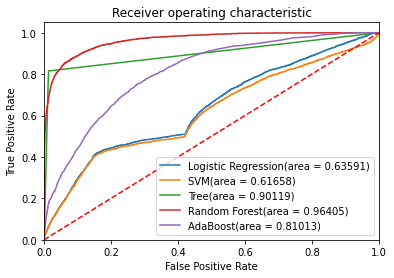

In [691]:
#plotting auc curves of gen_player_stats based models
plt.figure()
modellist = ["Logistic Regression", "SVM", "Tree", "Random Forest", "AdaBoost"]
for i in range(5):
    plt.plot(fpr[0][i], tpr[0][i], label=modellist[i]+'(area = %0.5f)' % rocauc[0][i])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()